In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from scipy import stats
from sklearn.model_selection import train_test_split # 학습용과 테스트용 데이터로 분리해주는 함수
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.neighbors import * # 선형회귀 모델
from sklearn.metrics import mean_squared_error # 잔차 에러 평균, 오차제곱평균, 정확도 측정지표
from sklearn.metrics import accuracy_score # 모델 예측 정확도 측정 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀보델 임포트
from sklearn.preprocessing import *
plt.rcParams['font.family'] = 'D2Coding'

In [2]:
joongboo = {
    '마량' : [857001],
    '내도둔': [857002],
    '춘장대':[857003],
    '홍원':[857004],
    '요포':[857005],
    '신흑':[859001],
    '천북':[859002],
    '교성':[859003],
    '송학':[859004],
    '죽정':[859005],
    '오포':[859006],
    '오천':[859007],
    '학성':[859008],
    '원산':[859009],
    '주포':[859010],
    '남포':[859011],
    '고남':[859012]
}

In [3]:
for k in joongboo:
    print(k, '-', joongboo[k])

마량 - [857001]
내도둔 - [857002]
춘장대 - [857003]
홍원 - [857004]
요포 - [857005]
신흑 - [859001]
천북 - [859002]
교성 - [859003]
송학 - [859004]
죽정 - [859005]
오포 - [859006]
오천 - [859007]
학성 - [859008]
원산 - [859009]
주포 - [859010]
남포 - [859011]
고남 - [859012]


In [4]:
for k in joongboo:
    url = 'http://apis.data.go.kr/B552521/aroundAir/getData'
    params ={'serviceKey' : 'bpyM+DPYXXSFsPBTXiGPeM5AKss0t8aL1dpb2SWiMBMWQZBcxqIr06HuAi/g04KGsqHEfQCIE95OJ7cmMi4n4Q==', 'pageNo' : '1', 'numOfRows' : '999999', 'stationName' : joongboo[k], 'dataDate' : '20220101', 'dataTerm' : 'YEAR' }
    response = requests.get(url, params=params)
    data = response.content
    joongboo[k].append(data)

In [2]:
# url = 'http://apis.data.go.kr/B552521/aroundAir/getData'
# params ={'serviceKey' : 'bpyM+DPYXXSFsPBTXiGPeM5AKss0t8aL1dpb2SWiMBMWQZBcxqIr06HuAi/g04KGsqHEfQCIE95OJ7cmMi4n4Q==', 'pageNo' : '1', 'numOfRows' : '999999', 'stationName' : '859007', 'dataDate' : '20220101', 'dataTerm' : 'YEAR' }
# response = requests.get(url, params=params)
# ochan = response.content

In [ ]:
# nadodon_soup = BeautifulSoup(joongboo['내도둔'][1], 'xml')
# nadodon_soup

In [ ]:
# chonjangdea_soup = BeautifulSoup(joongboo['춘장대'][1], 'xml')
# chonjangdea_soup

In [ ]:
# for k in joongboo:
#     joongboo_soup = []
#     joongboo_soup = BeautifulSoup(joongboo[k][1], 'xml')

#     # 모든 <item> 요소를 찾음
#     items = joongboo_soup.find_all('item')

#     # 모든 값을 담을 리스트 생성
#     joongboo_values = []

#     # 각 item에서 모든 값을 추출하여 리스트에 추가
#     for item in items:
        
#         item_values = {}

#         # item의 모든 자식 요소들을 반복하여 처리
#         for child in item.children:
#             if child.name:
#                 item_values[child.name] = child.text.strip()
#         joongboo_values.append(item_values)

In [ ]:
# joongboo_df = pd.DataFrame(joongboo_values)
# joongboo_df

In [ ]:
# joongboo_df.info()

In [ ]:
# joongboo_df['datatime'] = pd.to_datetime(joongboo_df['datatime'])
# joongboo_df.info()

In [ ]:
# # BeautifulSoup을 사용하여 XML 파싱
# maliang_soup = BeautifulSoup(joongboo['마량'][1], 'xml')
# maliang_soup

In [ ]:
# # BeautifulSoup을 사용하여 XML 파싱
# ochan_soup = BeautifulSoup(ochan, 'xml')

# # 모든 <item> 요소를 찾음
# items = ochan_soup.find_all('item')

# # 모든 값을 담을 리스트 생성
# ochan_values = []

# # 각 item에서 모든 값을 추출하여 리스트에 추가
# for item in items:
#     item_values = {}
#     # item의 모든 자식 요소들을 반복하여 처리
#     for child in item.children:
#         if child.name:
#             item_values[child.name] = child.text.strip()
#     ochan_values.append(item_values)
# ochan_df = pd.DataFrame(ochan_values)
# ochan_df

In [6]:
# BeautifulSoup을 사용하여 XML 파싱
maliang_soup = BeautifulSoup(joongboo['마량'][1], 'xml')

# 모든 <item> 요소를 찾음
items = maliang_soup.find_all('item')

# 모든 값을 담을 리스트 생성
maliang_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    maliang_values.append(item_values)
maliang_df = pd.DataFrame(maliang_values)
maliang_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.000,0.013,0.033,35,36,1,1,2,2,2
17516,2022-12-31 22:00,0.000,0.013,0.035,35,36,1,1,2,2,2
17517,2022-12-31 22:30,0.000,0.013,0.034,44,39,1,1,2,2,2
17518,2022-12-31 23:00,0.000,0.014,0.033,44,39,1,1,2,2,2


In [22]:
maliang_df.columns.to_list()

['datatime',
 'so2value',
 'no2value',
 'o3value',
 'pm10value',
 'pm25value',
 'so2grade',
 'no2grade',
 'o3grade',
 'pm10grade',
 'pm25grade']

In [23]:
maliang_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

In [24]:
maliang_df

,datatime,pm10value,pm25value,pm10grade,pm25grade
0,2022-01-01 00:00,NaN,NaN,NaN,NaN
1,2022-01-01 00:30,NaN,NaN,NaN,NaN
2,2022-01-01 01:00,NaN,NaN,NaN,NaN
3,2022-01-01 01:30,NaN,NaN,NaN,NaN
4,2022-01-01 02:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
17515,2022-12-31 21:30,35,36,2,2
17516,2022-12-31 22:00,35,36,2,2
17517,2022-12-31 22:30,44,39,2,2
17518,2022-12-31 23:00,44,39,2,2


In [25]:
maliang_df.to_csv('마량화력발전소미세먼지.csv', index=None)

In [7]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
neadodoon_soup = BeautifulSoup(joongboo['내도둔'][1], 'xml')

# 모든 <item> 요소를 찾음
items = neadodoon_soup.find_all('item')

# 모든 값을 담을 리스트 생성
neadodoon_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    neadodoon_values.append(item_values)
neadodoon_df = pd.DataFrame(neadodoon_values)
neadodoon_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.007,0.011,0.024,51,25,1,1,1,2,2
17516,2022-12-31 22:00,0.008,0.010,0.025,51,25,1,1,1,2,2
17517,2022-12-31 22:30,0.008,0.011,0.024,58,29,1,1,1,2,2
17518,2022-12-31 23:00,0.008,0.011,0.024,58,29,1,1,1,2,2


In [26]:
neadodoon_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

neadodoon_df.to_csv('내도둔화력발전소미세먼지.csv', index=None)

In [8]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
chunjangdea_soup = BeautifulSoup(joongboo['춘장대'][1], 'xml')

# 모든 <item> 요소를 찾음
items = chunjangdea_soup.find_all('item')

# 모든 값을 담을 리스트 생성
chunjangdea_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    chunjangdea_values.append(item_values)

chunjangdea_df = pd.DataFrame(chunjangdea_values)
chunjangdea_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.007,0.031,13,2,1,1,2,1,1
1,2022-01-01 00:30,0.002,0.007,0.032,14,3,1,1,2,1,1
2,2022-01-01 01:00,0.002,0.007,0.032,14,3,1,1,2,1,1
3,2022-01-01 01:30,0.002,0.007,0.032,14,5,1,1,2,1,1
4,2022-01-01 02:00,0.002,0.007,0.032,14,5,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.004,0.010,0.002,37,17,1,1,1,2,2
17516,2022-12-31 22:00,0.004,0.010,0.002,41,22,1,1,1,2,2
17517,2022-12-31 22:30,0.004,0.009,0.002,41,22,1,1,1,2,2
17518,2022-12-31 23:00,0.004,0.008,0.002,52,25,1,1,1,2,2


In [27]:
chunjangdea_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

chunjangdea_df.to_csv('춘장대화력발전소미세먼지.csv', index=None)

In [9]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
houngwon_soup = BeautifulSoup(joongboo['홍원'][1], 'xml')

# 모든 <item> 요소를 찾음
items = houngwon_soup.find_all('item')

# 모든 값을 담을 리스트 생성
houngwon_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    houngwon_values.append(item_values)

houngwon_df = pd.DataFrame(houngwon_values)
houngwon_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.007,0.006,0.036,16,2,1,1,2,1,1
1,2022-01-01 00:30,0.007,0.006,0.035,12,2,1,1,2,1,1
2,2022-01-01 01:00,0.007,0.006,0.035,12,2,1,1,2,1,1
3,2022-01-01 01:30,0.007,0.007,0.034,8,6,1,1,2,1,1
4,2022-01-01 02:00,0.007,0.006,0.036,8,6,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.006,0.012,0.033,42,16,1,1,2,2,2
17516,2022-12-31 22:00,0.001,0.012,0.033,41,20,1,1,2,2,2
17517,2022-12-31 22:30,0.008,0.012,0.034,41,20,1,1,2,2,2
17518,2022-12-31 23:00,0.007,0.013,0.034,42,19,1,1,2,2,2


In [28]:
houngwon_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

houngwon_df.to_csv('홍원화력발전소미세먼지.csv', index=None)

In [10]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
yopo_soup = BeautifulSoup(joongboo['요포'][1], 'xml')

# 모든 <item> 요소를 찾음
items = yopo_soup.find_all('item')

# 모든 값을 담을 리스트 생성
yopo_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    yopo_values.append(item_values)

yopo_df = pd.DataFrame(yopo_values)
yopo_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.003,0.006,0.037,5,5,1,1,2,1,1
1,2022-01-01 00:30,0.003,0.006,0.035,5,5,1,1,2,1,1
2,2022-01-01 01:00,0.003,0.006,0.035,4,4,1,1,2,1,1
3,2022-01-01 01:30,0.003,0.007,0.034,4,4,1,1,2,1,1
4,2022-01-01 02:00,0.003,0.007,0.035,7,3,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.006,0.000,0.041,33,33,1,1,2,2,2
17516,2022-12-31 22:00,0.006,0.000,0.041,33,33,1,1,2,2,2
17517,2022-12-31 22:30,0.007,0.000,0.041,39,39,1,1,2,2,2
17518,2022-12-31 23:00,0.007,0.000,0.040,39,39,1,1,2,2,2


In [29]:
yopo_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

yopo_df.to_csv('요포화력발전소미세먼지.csv', index=None)

In [11]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
sinhek_soup = BeautifulSoup(joongboo['신흑'][1], 'xml')

# 모든 <item> 요소를 찾음
items = sinhek_soup.find_all('item')

# 모든 값을 담을 리스트 생성
sinhek_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    sinhek_values.append(item_values)

sinhek_df = pd.DataFrame(sinhek_values)
sinhek_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.003,0.014,0.020,15,3,1,1,1,1,1
1,2022-01-01 00:30,0.003,0.006,0.040,15,3,1,1,2,1,1
2,2022-01-01 01:00,0.003,0.005,0.042,17,8,1,1,2,1,1
3,2022-01-01 01:30,0.003,0.005,0.038,17,8,1,1,2,1,1
4,2022-01-01 02:00,0.003,0.004,0.043,16,6,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17516,2022-12-31 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17517,2022-12-31 22:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2022-12-31 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
sinhek_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

sinhek_df.to_csv('신흑화력발전소미세먼지.csv', index=None)

In [21]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
chunbook_soup = BeautifulSoup(joongboo['천북'][1], 'xml')

# 모든 <item> 요소를 찾음
items = chunbook_soup.find_all('item')

# 모든 값을 담을 리스트 생성
chunbook_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    chunbook_values.append(item_values)

chunbook_df = pd.DataFrame(chunbook_values)
chunbook_df

,datatime
0,2022-01-01 00:00
1,2022-01-01 00:30
2,2022-01-01 01:00
3,2022-01-01 01:30
4,2022-01-01 02:00
...,...
17515,2022-12-31 21:30
17516,2022-12-31 22:00
17517,2022-12-31 22:30
17518,2022-12-31 23:00


In [12]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
kyoseong_soup = BeautifulSoup(joongboo['교성'][1], 'xml')

# 모든 <item> 요소를 찾음
items = kyoseong_soup.find_all('item')

# 모든 값을 담을 리스트 생성
kyoseong_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    kyoseong_values.append(item_values)

kyoseong_df = pd.DataFrame(kyoseong_values)
kyoseong_df

,datatime
0,2022-01-01 00:00
1,2022-01-01 00:30
2,2022-01-01 01:00
3,2022-01-01 01:30
4,2022-01-01 02:00
...,...
17515,2022-12-31 21:30
17516,2022-12-31 22:00
17517,2022-12-31 22:30
17518,2022-12-31 23:00


In [13]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
soonghak_soup = BeautifulSoup(joongboo['송학'][1], 'xml')

# 모든 <item> 요소를 찾음
items = soonghak_soup.find_all('item')

# 모든 값을 담을 리스트 생성
soonghak_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    soonghak_values.append(item_values)

soonghak_df = pd.DataFrame(soonghak_values)
soonghak_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.002,0.035,17,4,1,1,2,1,1
1,2022-01-01 00:30,0.002,0.002,0.039,17,5,1,1,2,1,1
2,2022-01-01 01:00,0.002,0.002,0.038,17,4,1,1,2,1,1
3,2022-01-01 01:30,0.002,0.001,0.039,17,4,1,1,2,1,1
4,2022-01-01 02:00,0.002,0.002,0.037,12,4,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.002,0.006,0.023,48,32,1,1,1,2,2
17516,2022-12-31 22:00,0.002,0.006,0.022,46,42,1,1,1,2,2
17517,2022-12-31 22:30,0.002,0.006,0.024,46,42,1,1,1,2,2
17518,2022-12-31 23:00,0.002,0.006,0.024,45,37,1,1,1,2,2


In [31]:
soonghak_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

soonghak_df.to_csv('송학화력발전소미세먼지.csv', index=None)

In [14]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
jooukjoung_soup = BeautifulSoup(joongboo['죽정'][1], 'xml')

# 모든 <item> 요소를 찾음
items = jooukjoung_soup.find_all('item')

# 모든 값을 담을 리스트 생성
jooukjoung_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    jooukjoung_values.append(item_values)

jooukjoung_df = pd.DataFrame(jooukjoung_values)
jooukjoung_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.002,0.018,21,8,1,1,1,1,1
1,2022-01-01 00:30,0.002,0.002,0.016,21,8,1,1,1,1,1
2,2022-01-01 01:00,0.002,0.003,0.017,21,8,1,1,1,1,1
3,2022-01-01 01:30,0.002,0.002,0.019,21,8,1,1,1,1,1
4,2022-01-01 02:00,0.002,0.002,0.021,19,9,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.001,0.008,0.015,44,20,1,1,1,2,2
17516,2022-12-31 22:00,0.001,0.007,0.013,38,20,1,1,1,2,2
17517,2022-12-31 22:30,0.001,0.015,0.009,38,20,1,1,1,2,2
17518,2022-12-31 23:00,0.001,0.018,0.007,47,20,1,1,1,2,2


In [32]:
jooukjoung_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

jooukjoung_df.to_csv('죽정화력발전소미세먼지.csv', index=None)

In [15]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
opo_soup = BeautifulSoup(joongboo['오포'][1], 'xml')

# 모든 <item> 요소를 찾음
items = opo_soup.find_all('item')

# 모든 값을 담을 리스트 생성
opo_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    opo_values.append(item_values)

opo_df = pd.DataFrame(opo_values)
opo_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.003,0.003,0.033,14,6,1,1,2,1,1
1,2022-01-01 00:30,0.003,0.003,0.034,14,6,1,1,2,1,1
2,2022-01-01 01:00,0.003,0.003,0.034,17,9,1,1,2,1,1
3,2022-01-01 01:30,0.003,0.003,0.034,17,9,1,1,2,1,1
4,2022-01-01 02:00,0.003,0.003,0.035,14,8,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.012,0.008,0.025,52,35,1,1,1,2,2
17516,2022-12-31 22:00,0.013,0.007,0.028,53,40,1,1,1,2,2
17517,2022-12-31 22:30,0.014,0.008,0.024,53,40,1,1,1,2,2
17518,2022-12-31 23:00,0.013,0.010,0.023,68,44,1,1,1,2,2


In [33]:
opo_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

opo_df.to_csv('오포화력발전소미세먼지.csv', index=None)

In [16]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
ochan_soup = BeautifulSoup(joongboo['오천'][1], 'xml')

# 모든 <item> 요소를 찾음
items = ochan_soup.find_all('item')

# 모든 값을 담을 리스트 생성
ochan_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    ochan_values.append(item_values)

ochan_df = pd.DataFrame(ochan_values)
ochan_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.009,0.014,20,17,1,1,1,1,2
1,2022-01-01 00:30,0.002,0.011,0.012,20,17,1,1,1,1,2
2,2022-01-01 01:00,0.002,0.013,0.010,27,21,1,1,1,1,2
3,2022-01-01 01:30,0.002,0.014,0.009,27,21,1,1,1,1,2
4,2022-01-01 02:00,0.002,0.015,0.008,24,23,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.005,0.016,0.009,79,30,1,1,1,2,2
17516,2022-12-31 22:00,0.005,0.013,0.012,55,33,1,1,1,2,2
17517,2022-12-31 22:30,0.003,0.011,0.010,55,32,1,1,1,2,2
17518,2022-12-31 23:00,0.003,0.013,0.008,67,35,1,1,1,2,2


In [34]:
ochan_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

ochan_df.to_csv('오천화력발전소미세먼지.csv', index=None)

In [17]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
haksung_soup = BeautifulSoup(joongboo['학성'][1], 'xml')

# 모든 <item> 요소를 찾음
items = haksung_soup.find_all('item')

# 모든 값을 담을 리스트 생성
haksung_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    haksung_values.append(item_values)

haksung_df = pd.DataFrame(haksung_values)
haksung_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.005,0.017,16,8,1,1,1,1,1
1,2022-01-01 00:30,0.002,0.005,0.018,16,8,1,1,1,1,1
2,2022-01-01 01:00,0.002,0.005,0.017,14,9,1,1,1,1,1
3,2022-01-01 01:30,0.002,0.005,0.017,14,8,1,1,1,1,1
4,2022-01-01 02:00,0.002,0.005,0.017,17,10,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.003,0.013,0.023,54,24,1,1,1,2,2
17516,2022-12-31 22:00,0.003,0.012,0.026,58,19,1,1,1,2,2
17517,2022-12-31 22:30,0.003,0.010,0.027,58,19,1,1,1,2,2
17518,2022-12-31 23:00,0.003,0.010,0.025,52,29,1,1,1,2,2


In [35]:
haksung_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

haksung_df.to_csv('학성화력발전소미세먼지.csv', index=None)

In [18]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
wonsan_soup = BeautifulSoup(joongboo['원산'][1], 'xml')

# 모든 <item> 요소를 찾음
items = wonsan_soup.find_all('item')

# 모든 값을 담을 리스트 생성
wonsan_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    wonsan_values.append(item_values)

wonsan_df = pd.DataFrame(wonsan_values)
wonsan_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.005,0.038,10,5,1,1,2,1,1
1,2022-01-01 00:30,0.002,0.005,0.038,10,5,1,1,2,1,1
2,2022-01-01 01:00,0.002,0.005,0.039,16,6,1,1,2,1,1
3,2022-01-01 01:30,0.002,0.006,0.037,16,7,1,1,2,1,1
4,2022-01-01 02:00,0.002,0.005,0.038,15,6,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17516,2022-12-31 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17517,2022-12-31 22:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2022-12-31 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
wonsan_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

wonsan_df.to_csv('원산화력발전소미세먼지.csv', index=None)

In [19]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
joopo_soup = BeautifulSoup(joongboo['주포'][1], 'xml')

# 모든 <item> 요소를 찾음
items = joopo_soup.find_all('item')

# 모든 값을 담을 리스트 생성
joopo_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    joopo_values.append(item_values)

joopo_df = pd.DataFrame(joopo_values)
joopo_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.007,0.023,27,28,1,1,1,1,2
1,2022-01-01 00:30,0.002,0.006,0.023,27,28,1,1,1,1,2
2,2022-01-01 01:00,0.003,0.010,0.019,26,23,1,1,1,1,2
3,2022-01-01 01:30,0.003,0.007,0.028,26,23,1,1,1,1,2
4,2022-01-01 02:00,0.003,0.011,0.016,60,60,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17516,2022-12-31 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17517,2022-12-31 22:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2022-12-31 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
joopo_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

joopo_df.to_csv('주포화력발전소미세먼지.csv', index=None)

In [20]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
nampo_soup = BeautifulSoup(joongboo['남포'][1], 'xml')

# 모든 <item> 요소를 찾음
items = nampo_soup.find_all('item')

# 모든 값을 담을 리스트 생성
nampo_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    nampo_values.append(item_values)


nampo_df = pd.DataFrame(nampo_values)
nampo_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.011,0.025,25,18,1,1,1,1,2
1,2022-01-01 00:30,0.002,0.008,0.030,25,18,1,1,1,1,2
2,2022-01-01 01:00,0.002,0.009,0.029,20,15,1,1,1,1,1
3,2022-01-01 01:30,0.002,0.005,0.035,20,15,1,1,2,1,1
4,2022-01-01 02:00,0.002,0.006,0.032,19,13,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17516,2022-12-31 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17517,2022-12-31 22:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2022-12-31 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
nampo_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

nampo_df.to_csv('남포화력발전소미세먼지.csv', index=None)

In [21]:
# joongboo = {
#     '마량' : [857001],
#     '내도둔': [857002],
#     '춘장대':[857003],
#     '홍원':[857004],
#     '요포':[857005],
#     '신흑':[859001],
#     '천북':[859002],
#     '교성':[859003],
#     '송학':[859004],
#     '죽정':[859005],
#     '오포':[859006],
#     '오천':[859007],
#     '학성':[859008],
#     '원산':[859009],
#     '주포':[859010],
#     '남포':[859011],
#     '고남':[859012]
# }

# BeautifulSoup을 사용하여 XML 파싱
gonam_soup = BeautifulSoup(joongboo['고남'][1], 'xml')

# 모든 <item> 요소를 찾음
items = gonam_soup.find_all('item')

# 모든 값을 담을 리스트 생성
gonam_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    gonam_values.append(item_values)


gonam_df = pd.DataFrame(gonam_values)
gonam_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.003,0.006,0.036,10,2,1,1,2,1,1
1,2022-01-01 00:30,0.003,0.006,0.034,10,2,1,1,2,1,1
2,2022-01-01 01:00,0.003,0.007,0.033,16,3,1,1,2,1,1
3,2022-01-01 01:30,0.003,0.006,0.035,17,3,1,1,2,1,1
4,2022-01-01 02:00,0.003,0.006,0.036,16,6,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17516,2022-12-31 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17517,2022-12-31 22:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2022-12-31 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
gonam_df.drop([
 'so2value',
 'no2value',
 'o3value',
 'so2grade',
 'no2grade',
 'o3grade'], axis=1, inplace=True)

gonam_df.to_csv('고남화력발전소미세먼지.csv', index=None)

In [36]:
maliang_df = pd.DataFrame(maliang_values)
neadodoon_df = pd.DataFrame(neadodoon_values)
chunjangdea_df = pd.DataFrame(chunjangdea_values)
houngwon_df = pd.DataFrame(houngwon_values)
yopo_df = pd.DataFrame(yopo_values)
sinhek_df = pd.DataFrame(sinhek_values)
chunbook_df = pd.DataFrame(chunbook_values)
kyoseong_df = pd.DataFrame(kyoseong_values)
soonghak_df = pd.DataFrame(soonghak_values)
jooukjoung_df = pd.DataFrame(jooukjoung_values)
opo_df = pd.DataFrame(opo_values)
ochan_df = pd.DataFrame(ochan_values)
haksung_df = pd.DataFrame(haksung_values)
wonsan_df = pd.DataFrame(wonsan_values)
joopo_df = pd.DataFrame(joopo_values)
nampo_df = pd.DataFrame(nampo_values)
gonam_df = pd.DataFrame(gonam_values)

In [48]:
maliang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datatime   17520 non-null  datetime64[ns]
 1   so2value   12969 non-null  object        
 2   no2value   12953 non-null  object        
 3   o3value    12988 non-null  object        
 4   pm10value  12992 non-null  object        
 5   pm25value  13004 non-null  object        
 6   so2grade   12969 non-null  object        
 7   no2grade   12953 non-null  object        
 8   o3grade    12988 non-null  object        
 9   pm10grade  12992 non-null  object        
 10  pm25grade  13004 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.5+ MB


In [35]:
maliang_df['datatime'] = pd.to_datetime(maliang_df['datatime'])
maliang_df.head()

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
maliang_df.columns.to_list()

['datatime',
 'so2value',
 'no2value',
 'o3value',
 'pm10value',
 'pm25value',
 'so2grade',
 'no2grade',
 'o3grade',
 'pm10grade',
 'pm25grade']

In [51]:
maliang_df['so2value'] = maliang_df['so2value'].astype(float)
maliang_df['no2value'] = maliang_df['no2value'].astype(float)
maliang_df['o3value'] = maliang_df['o3value'].astype(float)
maliang_df['pm10value'] = maliang_df['pm10value'].astype(float)
maliang_df['pm25value'] = maliang_df['pm25value'].astype(float)
maliang_df['so2grade'] = maliang_df['so2grade'].astype(float)
maliang_df['no2grade'] = maliang_df['no2grade'].astype(float)
maliang_df['o3grade'] = maliang_df['o3grade'].astype(float)
maliang_df['pm10grade'] = maliang_df['pm10grade'].astype(float)
maliang_df['pm25grade'] = maliang_df['pm25grade'].astype(float)

In [52]:
maliang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datatime   17520 non-null  datetime64[ns]
 1   so2value   12969 non-null  float64       
 2   no2value   12953 non-null  float64       
 3   o3value    12988 non-null  float64       
 4   pm10value  12992 non-null  float64       
 5   pm25value  13004 non-null  float64       
 6   so2grade   12969 non-null  float64       
 7   no2grade   12953 non-null  float64       
 8   o3grade    12988 non-null  float64       
 9   pm10grade  12992 non-null  float64       
 10  pm25grade  13004 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.5 MB


In [36]:
maliang_df.isna().sum()

datatime        0
so2value     4551
no2value     4567
o3value      4532
pm10value    4528
pm25value    4516
so2grade     4551
no2grade     4567
o3grade      4532
pm10grade    4528
pm25grade    4516
dtype: int64

In [61]:
maliang_df[maliang_df.isnull().any(axis=1)]

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16242,2022-12-05 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16243,2022-12-05 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16244,2022-12-05 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16245,2022-12-05 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
mdf = maliang_df[maliang_df.isnull().any(axis=1)]
mdf

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16242,2022-12-05 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16243,2022-12-05 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16244,2022-12-05 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16245,2022-12-05 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
mdf[]

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 16246
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datatime   4593 non-null   datetime64[ns]
 1   so2value   42 non-null     float64       
 2   no2value   26 non-null     float64       
 3   o3value    61 non-null     float64       
 4   pm10value  65 non-null     float64       
 5   pm25value  77 non-null     float64       
 6   so2grade   42 non-null     float64       
 7   no2grade   26 non-null     float64       
 8   o3grade    61 non-null     float64       
 9   pm10grade  65 non-null     float64       
 10  pm25grade  77 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 430.6 KB


In [ ]:
maliang_df
neadodoon_df
chunjangdea_df
houngwon_df
yopo_df
sinhek_df
chunbook_df
kyoseong_df
soonghak_df
jooukjoung_df
opo_df
ochan_df
haksung_df
wonsan_df
joopo_df
nampo_df
gonam_df

In [ ]:
# data1.groupby(['cc_num', 'category'])[['cc_num', 'amt']].agg(['mean', 'std'])['amt'].reset_index()

In [75]:
maliang_info = maliang_df.groupby('datatime')[['pm10value', 'pm25value']].mean()
maliang_info.head()

,pm10value,pm25value
datatime,,
2022-01-01 00:00:00,NaN,NaN
2022-01-01 00:30:00,NaN,NaN
2022-01-01 01:00:00,NaN,NaN
2022-01-01 01:30:00,NaN,NaN
2022-01-01 02:00:00,NaN,NaN


In [77]:
maliang_info

pm10value    4528
pm25value    4516
dtype: int64

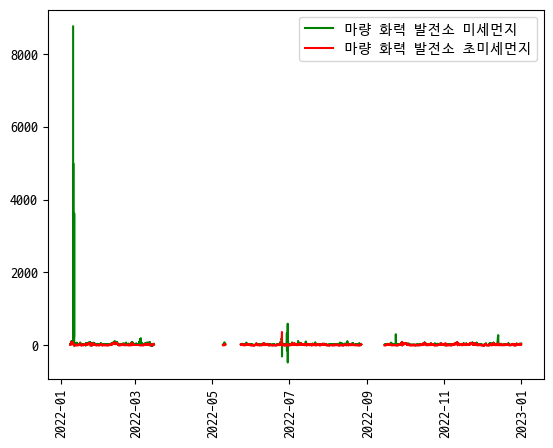

In [80]:
plt.plot(maliang_df['datatime'], maliang_df['pm10value'], color='g', label='마량 화력 발전소 미세먼지')
plt.plot(maliang_df['datatime'], maliang_df['pm25value'], color='r', label='마량 화력 발전소 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [85]:
neadodoon_df['datatime'] = pd.to_datetime(neadodoon_df['datatime'])
neadodoon_df['so2value'] = neadodoon_df['so2value'].astype(float)
neadodoon_df['no2value'] = neadodoon_df['no2value'].astype(float)
neadodoon_df['o3value'] = neadodoon_df['o3value'].astype(float)
neadodoon_df['pm10value'] = neadodoon_df['pm10value'].astype(float)
neadodoon_df['pm25value'] = neadodoon_df['pm25value'].astype(float)
neadodoon_df['so2grade'] = neadodoon_df['so2grade'].astype(float)
neadodoon_df['no2grade'] = neadodoon_df['no2grade'].astype(float)
neadodoon_df['o3grade'] = neadodoon_df['o3grade'].astype(float)
neadodoon_df['pm10grade'] = neadodoon_df['pm10grade'].astype(float)
neadodoon_df['pm25grade'] = neadodoon_df['pm25grade'].astype(float)

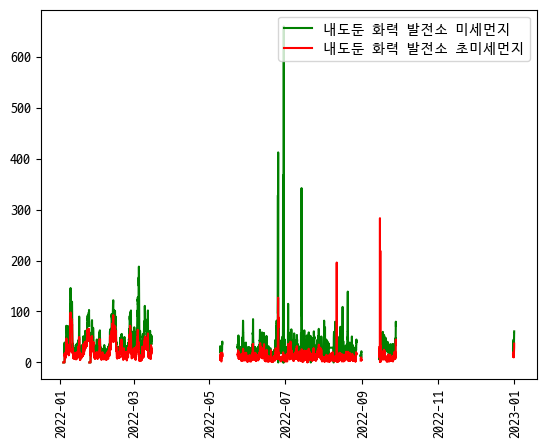

In [86]:
plt.plot(neadodoon_df['datatime'], neadodoon_df['pm10value'], color='g', label='내도둔 화력 발전소 미세먼지')
plt.plot(neadodoon_df['datatime'], neadodoon_df['pm25value'], color='r', label='내도둔 화력 발전소 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [88]:
chunjangdea_df['datatime'] = pd.to_datetime(chunjangdea_df['datatime'])
chunjangdea_df['so2value'] = chunjangdea_df['so2value'].astype(float)
chunjangdea_df['no2value'] = chunjangdea_df['no2value'].astype(float)
chunjangdea_df['o3value'] = chunjangdea_df['o3value'].astype(float)
chunjangdea_df['pm10value'] = chunjangdea_df['pm10value'].astype(float)
chunjangdea_df['pm25value'] = chunjangdea_df['pm25value'].astype(float)
chunjangdea_df['so2grade'] = chunjangdea_df['so2grade'].astype(float)
chunjangdea_df['no2grade'] = chunjangdea_df['no2grade'].astype(float)
chunjangdea_df['o3grade'] = chunjangdea_df['o3grade'].astype(float)
chunjangdea_df['pm10grade'] = chunjangdea_df['pm10grade'].astype(float)
chunjangdea_df['pm25grade'] = chunjangdea_df['pm25grade'].astype(float)

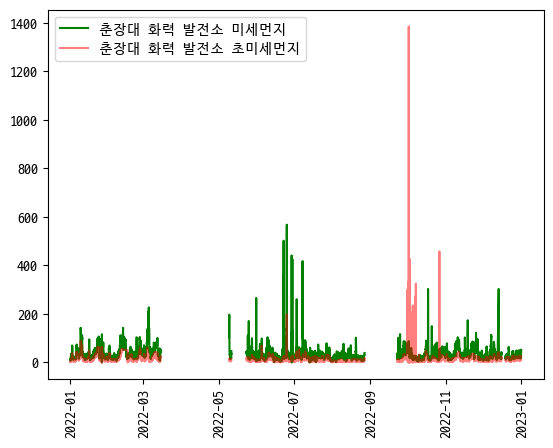

In [91]:
plt.plot(chunjangdea_df['datatime'], chunjangdea_df['pm10value'], color='g', label='춘장대 화력 발전소 미세먼지')
plt.plot(chunjangdea_df['datatime'], chunjangdea_df['pm25value'], color='r', label='춘장대 화력 발전소 초미세먼지', alpha= 0.5)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [92]:
houngwon_df['datatime'] = pd.to_datetime(houngwon_df['datatime'])
houngwon_df['so2value'] = houngwon_df['so2value'].astype(float)
houngwon_df['no2value'] = houngwon_df['no2value'].astype(float)
houngwon_df['o3value'] = houngwon_df['o3value'].astype(float)
houngwon_df['pm10value'] = houngwon_df['pm10value'].astype(float)
houngwon_df['pm25value'] = houngwon_df['pm25value'].astype(float)
houngwon_df['so2grade'] = houngwon_df['so2grade'].astype(float)
houngwon_df['no2grade'] = houngwon_df['no2grade'].astype(float)
houngwon_df['o3grade'] = houngwon_df['o3grade'].astype(float)
houngwon_df['pm10grade'] = houngwon_df['pm10grade'].astype(float)
houngwon_df['pm25grade'] = houngwon_df['pm25grade'].astype(float)

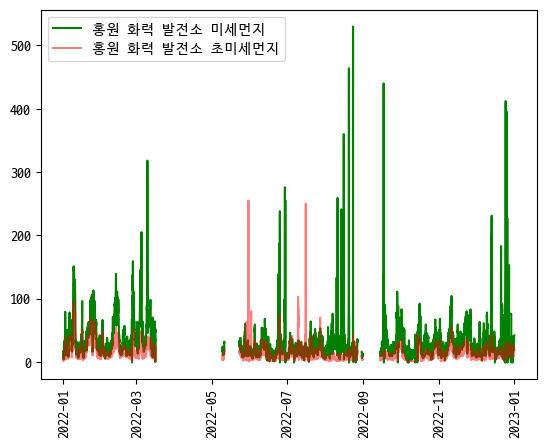

In [93]:
plt.plot(houngwon_df['datatime'], houngwon_df['pm10value'], color='g', label='홍원 화력 발전소 미세먼지')
plt.plot(houngwon_df['datatime'], houngwon_df['pm25value'], color='r', label='홍원 화력 발전소 초미세먼지', alpha= 0.5)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [94]:
yopo_df['datatime'] = pd.to_datetime(yopo_df['datatime'])
yopo_df['so2value'] = yopo_df['so2value'].astype(float)
yopo_df['no2value'] = yopo_df['no2value'].astype(float)
yopo_df['o3value'] = yopo_df['o3value'].astype(float)
yopo_df['pm10value'] = yopo_df['pm10value'].astype(float)
yopo_df['pm25value'] = yopo_df['pm25value'].astype(float)
yopo_df['so2grade'] = yopo_df['so2grade'].astype(float)
yopo_df['no2grade'] = yopo_df['no2grade'].astype(float)
yopo_df['o3grade'] = yopo_df['o3grade'].astype(float)
yopo_df['pm10grade'] = yopo_df['pm10grade'].astype(float)
yopo_df['pm25grade'] = yopo_df['pm25grade'].astype(float)

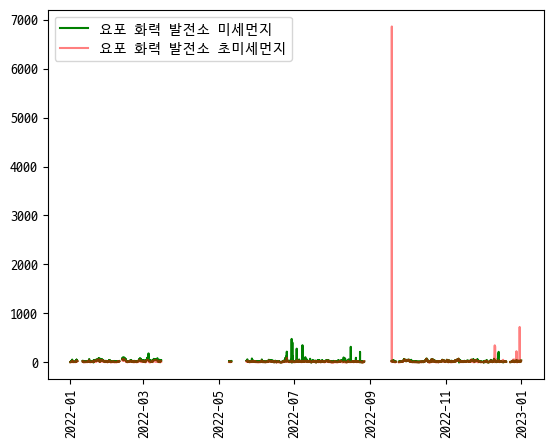

In [95]:
plt.plot(yopo_df['datatime'], yopo_df['pm10value'], color='g', label='요포 화력 발전소 미세먼지')
plt.plot(yopo_df['datatime'], yopo_df['pm25value'], color='r', label='요포 화력 발전소 초미세먼지', alpha= 0.5)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [97]:
sinhek_df['datatime'] = pd.to_datetime(sinhek_df['datatime'])
sinhek_df['so2value'] = sinhek_df['so2value'].astype(float)
sinhek_df['no2value'] = sinhek_df['no2value'].astype(float)
sinhek_df['o3value'] = sinhek_df['o3value'].astype(float)
sinhek_df['pm10value'] = sinhek_df['pm10value'].astype(float)
sinhek_df['pm25value'] = sinhek_df['pm25value'].astype(float)
sinhek_df['so2grade'] = sinhek_df['so2grade'].astype(float)
sinhek_df['no2grade'] = sinhek_df['no2grade'].astype(float)
sinhek_df['o3grade'] = sinhek_df['o3grade'].astype(float)
sinhek_df['pm10grade'] = sinhek_df['pm10grade'].astype(float)
sinhek_df['pm25grade'] = sinhek_df['pm25grade'].astype(float)

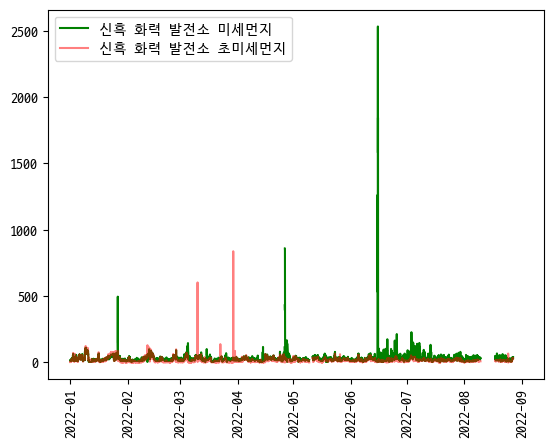

In [98]:
plt.plot(sinhek_df['datatime'], sinhek_df['pm10value'], color='g', label='신흑 화력 발전소 미세먼지')
plt.plot(sinhek_df['datatime'], sinhek_df['pm25value'], color='r', label='신흑 화력 발전소 초미세먼지', alpha= 0.5)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [99]:
ochan_df['datatime'] = pd.to_datetime(ochan_df['datatime'])
ochan_df['so2value'] = ochan_df['so2value'].astype(float)
ochan_df['no2value'] = ochan_df['no2value'].astype(float)
ochan_df['o3value'] = ochan_df['o3value'].astype(float)
ochan_df['pm10value'] = ochan_df['pm10value'].astype(float)
ochan_df['pm25value'] = ochan_df['pm25value'].astype(float)
ochan_df['so2grade'] = ochan_df['so2grade'].astype(float)
ochan_df['no2grade'] = ochan_df['no2grade'].astype(float)
ochan_df['o3grade'] = ochan_df['o3grade'].astype(float)
ochan_df['pm10grade'] = ochan_df['pm10grade'].astype(float)
ochan_df['pm25grade'] = ochan_df['pm25grade'].astype(float)

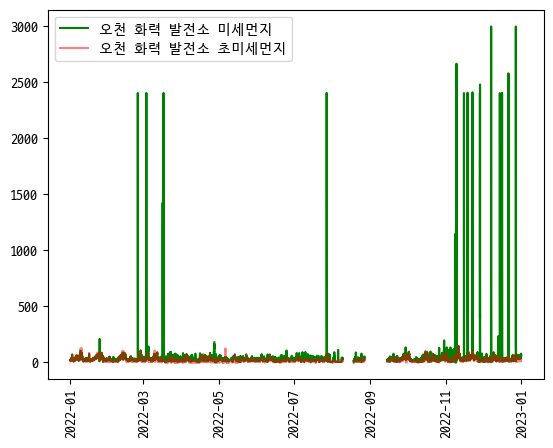

In [100]:
plt.plot(ochan_df['datatime'], ochan_df['pm10value'], color='g', label='오천 화력 발전소 미세먼지')
plt.plot(ochan_df['datatime'], ochan_df['pm25value'], color='r', label='오천 화력 발전소 초미세먼지', alpha= 0.5)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [81]:
mis = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_20240619163513.csv', encoding='cp949')
mis

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,총계,소계,39,38,40,41,34,34,20,24,...,42,39,33,22,22,19,22,26,39,35
1,서울특별시,서울특별시,42,41,45,44,35,36,21,23,...,41,45,33,22,25,20,22,25,39,38
2,부산광역시,부산광역시,32,34,33,36,32,27,18,31,...,38,32,31,19,20,19,20,21,33,30
3,대구광역시,대구광역시,37,38,38,39,38,35,22,25,...,42,36,33,22,20,18,20,24,41,35
4,인천광역시,인천광역시,42,37,41,39,31,32,21,24,...,42,44,32,21,26,21,26,30,41,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,경상남도,합천,25,26,27,29,29,29,17,27,...,30,29,30,23,24,22,20,20,29,28
168,경상남도,도평균,29,32,31,33,32,29,20,29,...,34,29,29,19,21,19,20,21,31,28
169,제주특별자치도,제주,35,38,39,44,38,28,21,24,...,42,32,29,20,18,17,28,27,34,32
170,제주특별자치도,서귀포,29,32,33,40,35,27,19,32,...,39,30,28,22,23,19,28,24,27,25


In [104]:
ochan = mis[mis['구분(2)'] == '보령']
ochan

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
78,충청남도,보령,43,44,46,40,31,32,20,24,...,43,42,33,20,24,19,27,35,47,37


In [82]:
sech = mis[mis['구분(2)'] == '인천광역시']
sech = sech.iloc[:, 2:].copy()
sech.reset_index(drop=True, inplace=True)
sech = sech.transpose().reset_index()
sech.columns = ['날짜', '인천 미세먼지 농도']
sech['인천 미세먼지 농도'] = sech['인천 미세먼지 농도'].astype(int)
sech

,날짜,인천 미세먼지 농도
0,2020.01,42
1,2020.02,37
2,2020.03,41
3,2020.04,39
4,2020.05,31
5,2020.06,32
6,2020.07,21
7,2020.08,24
8,2020.09,20
9,2020.10,34
